In [1]:
!pip3 install seaborn matplotlib pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### In Class Activity A

Load the blue bikes data into a dataframe and answer the following questions:
- How many bike trips are in the dataset, in total?
- What period of time does the data represent?
- How many different stations did users start at?
- What was the average lattitude / longitude for a starting station?
- How many bike trips are taken on a monday (`dayofweek=0`) within the dataset?
    - hint: grab just the monday trips via boolean indexing


In [2]:
# load blue bike data into a dataframe
df = pd.read_csv('201909-bluebike-clean.csv')
df


,Unnamed: 0,tripduration,starttime,startday,starthour,dayofweek,distance,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude
0,0,916,2019-09-01 00:00:21.2560,2019-09-01,0,6,1.144749,9,Commonwealth Ave at Agganis Way,42.351692,-71.119035,33,Kenmore Square,42.348706,-71.097009
1,1,394,2019-09-01 00:00:33.0140,2019-09-01,0,6,0.858182,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295
2,2,480,2019-09-01 00:00:52.4870,2019-09-01,0,6,0.556982,9,Commonwealth Ave at Agganis Way,42.351692,-71.119035,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279
3,3,800,2019-09-01 00:01:05.5390,2019-09-01,0,6,1.912004,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,199,Upham's Corner T Stop - Magnolia St at Dudley St,42.318697,-71.069781
4,4,758,2019-09-01 00:01:13.4250,2019-09-01,0,6,1.224275,56,Dudley Square - Dudley St at Warren St,42.329843,-71.083866,55,Boylston St at Massachusetts Ave,42.347265,-71.088088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361138,363180,278,2019-09-30 23:55:58.3950,2019-09-30,23,0,0.721736,9,Commonwealth Ave at Agganis Way,42.351692,-71.119035,66,Allston Green District - Griggs St at Commonwe...,42.349225,-71.132753
361139,363181,879,2019-09-30 23:56:33.8420,2019-09-30,23,0,2.381892,30,Brigham Circle - Francis St at Huntington Ave,42.334629,-71.104079,420,Charles St at Pinckney St,42.358725,-71.070795
361140,363182,205,2019-09-30 23:56:57.4170,2019-09-30,23,0,0.567883,361,Deerfield St at Commonwealth Ave,42.349244,-71.097282,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279
361141,363183,716,2019-09-30 23:57:01.3430,2019-09-30,23,0,1.451716,397,Broadway at Beacham St,42.398361,-71.063738,188,Foss Park,42.391084,-71.090394


In [3]:
# number of total bike trips in the dataset
trips = len(df)
print("total bike trips:", trips)

total bike trips: 361143


In [4]:
# period of time that the data represent
start = df["starttime"].min()
end = df["starttime"].max()
print("The period of time is between", start, "and", end)


The period of time is between 2019-09-01 00:00:21.2560 and 2019-09-30 23:58:29.3290


In [5]:
# number of different stations that users start at
stations = len(df['start station name'].value_counts())
print("There are", stations, "different starting stations")


There are 328 different starting stations


In [6]:
# the average latitude for a starting station
df_lat = df['start station latitude'].mean()
print("average latitude:", df_lat)

# the average longitude for a starting station
df_long = df['start station longitude'].mean()
print("average longitude:", df_long)

average latitude: 42.35702935988099
average longitude: -71.08852011306536


In [7]:
# number of bike trips taken on a monday (dayofweek=0) 
monday = df['dayofweek'] == 0
m_trips = len(df.loc[monday, :])
print(m_trips, "bike trips are taken on a Monday")


57932 bike trips are taken on a Monday


## In Class Activity B
Build a 1 x 3 subplot array of histograms showing the distance travelled from the following starting stations:
- `Commonwealth Ave at Agganis Way`
- `Kendall T`
- `Ring Rd`

for each plot:
- add title
- label axes

**tip:** build just one of the figures and don't worry about subplot initially, once you've got that settled it'll be easier to build the loop

see what issues come up for you ... any suggestions on displaying this data?  does this graph "lie" to you in any way?


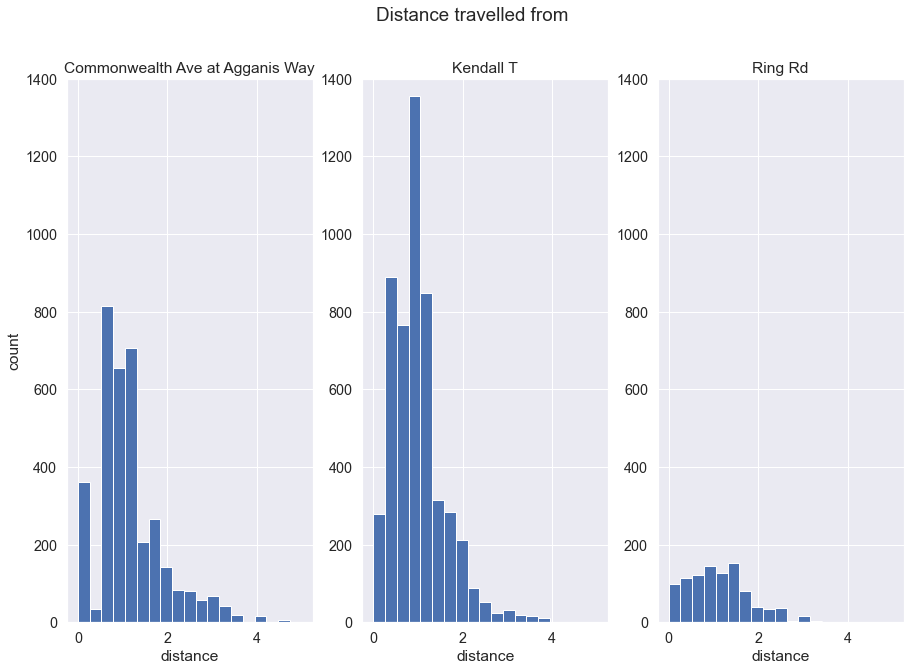

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

station_list = ['Commonwealth Ave at Agganis Way', 'Kendall T', 'Ring Rd']
bins = np.linspace(0, 5, 20)
sns.set(font_scale=1.3)

for station_idx in range(3):
    # find station
    station = station_list[station_idx]
    
    # boolean index to get trips
    bool_station = df['start station name'] == station
    df_station = df.loc[bool_station, :]
    
    # plot histogram
    plt.subplot(1, 3, station_idx + 1 )
    plt.hist(df_station['distance'], bins=bins)
    
    # title each subplot
    plt.gca().title.set_text(station)
    plt.xlabel('distance')
    plt.ylim(0,1400)
    
    if station_idx == 0:
        plt.ylabel('count')

# titles for subplots
plt.suptitle('Distance travelled from') 
# resizes the whole figure 
plt.gcf().set_size_inches((15, 10))

## In class activity C (tight on time, but hopefully!)
Use any graphing method you'd like to answer:

1. Do folks travelling longer distances go faster on `2019-09-30`?
2. (++) Does the relationship hold up on every day of the week? 
    - (subplots)

You have `tripduration` and `distance` ... you can compute `speed` as:
```python
df_bikes['speed'] = df_bikes['distance'] / df_bikes['tripduration']`
```


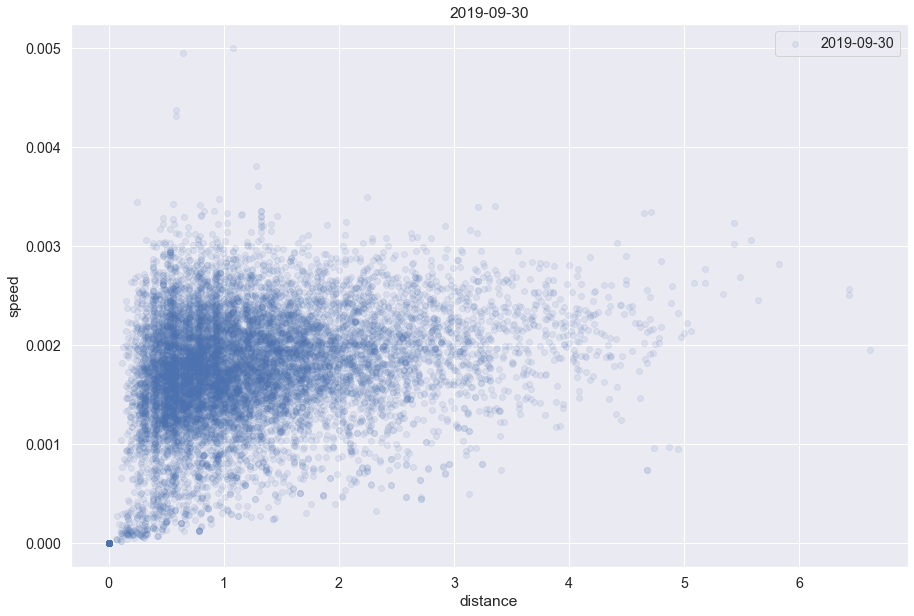

In [9]:
# speed
df['speed'] = df['distance'] / df['tripduration']

# boolean index: only rows with start days
bool_day = df['startday'] == '2019-09-30'
df_day = df.loc[bool_day, :]

# scatter
plt.scatter(df_day['distance'],
            df_day['speed'], alpha=.1, label='2019-09-30')

# label
plt.legend()
plt.xlabel('distance')
plt.ylabel('speed')
plt.title('2019-09-30')
plt.gcf().set_size_inches(15, 10)